In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [149]:
n, phi, error_phi = np.arange(1,10), [12*np.pi/180,22*np.pi/180,25*np.pi/180,38*np.pi/180,46*np.pi/180,72*np.pi/180,77*np.pi/180,86*np.pi/180,135*np.pi/180], [2*np.pi/180,4*np.pi/180,5*np.pi/180,6*np.pi/180,7*np.pi/180,10*np.pi/180,12*np.pi/180,16*np.pi/180,18*np.pi/180]

In [150]:
sin, errorsin = [0]*9, [0]*9

In [151]:
sin, errorsin, d = [0]*9, [0]*9, [0]*9
for i in range(len(phi)):
    sin[i] = np.sin(phi[i]/2)
    errorsin[i] = np.sqrt((np.cos(phi[i]/2)*error_phi[i])**2) #(cos(phi/2)*error_phi)**2
    d[i] = n[i]*0.0711/2/sin[i]

In [152]:
print(d) #in nm

[0.340098752901125, 0.37262394186233405, 0.4927471365315761, 0.4367749058168799, 0.45491640424773466, 0.3628876348429802, 0.3997496369629321, 0.41700980039590935, 0.3463113844835514]


In [153]:
data = [n, phi, error_phi, sin, errorsin, d]

Text(0, 0.5, 'sin(phi/2)')

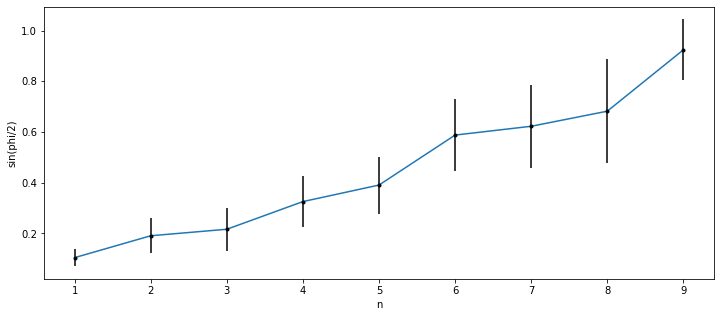

In [154]:
plt.figure(figsize=(12, 5))
plt.plot(n, sin)
plt.errorbar(n, sin , yerr = errorsin,fmt='.k', label = "errorbar")
plt.xlabel("n")
plt.ylabel("sin(phi/2)")        

#### 3. Estimators

In [100]:
uniform = np.random.uniform(160, 180, 10)
normal = np.random.normal(170, 10, 10)

In [40]:
normal

array([145.89014949, 155.61887355, 155.67434623, 160.60345676,
       162.53212722, 164.30784052, 172.47097252, 175.64771527,
       176.80290865, 179.285069  ])

In [37]:
uniform.sort()
normal.sort()

In [108]:
def mode(ls):
    counts = {}
    for item in ls:
        if int(item) in counts:
            counts[int(item)] += 1
        else:
            counts[int(item)] = 1  
    return [key for key in counts.keys() if counts[key] == max(counts.values())]    
            

In [104]:
mode(uniform)

[169, 176, 166]

In [109]:
arithmetic = [0,0] #arithmetic mean
median = [uniform[4], normal[4]]#median
geometric = [1,1]#geometric mean
modelist = [mode(uniform),mode(normal)] #mode
for i in range(10):
        arithmetic[0] += uniform[i]/10 
        arithmetic[1] += normal[i]/10
        geometric[0]*uniform[i]
        geometric[1]*normal[i]        
        
geometric[0] = np.sqrt(geometric[0])
geometric[1] = np.sqrt(geometric[1])

In [115]:
#normal and uniform
n = 10000
arithmetic = [[],[]] #arithmetic mean uniform, normal
median = [[],[]]#median uniform, normal
geometric = [[],[]]#geometric mean uniform, normal
modelist = [[],[]] #mode uniform, normal
for j in range(n):
    uniform = np.random.uniform(160, 180, 10)
    normal = np.random.normal(170, 10, 10)
    uniform.sort()
    normal.sort()
    arithmetic[0].append(0)#arithmetic mean
    arithmetic[1].append(0)
    median[0].append(uniform[4])
    median[1].append(normal[4])#median
    geometric[0].append(1)#geometric mean
    geometric[1].append(1)
    modelist[0].append(mode(uniform))
    modelist[1].append(mode(normal)) #mode
    for i in range(10):
        arithmetic[0][j] += uniform[i]/10 
        arithmetic[1][j] += normal[i]/10
        geometric[0][j] = geometric[0][j]*uniform[i]
        geometric[1][j] = geometric[1][j]*normal[i]              
    geometric[0][j] = (geometric[0][j])**(1/10)
    geometric[1][j] = (geometric[1][j])**(1/10)

In [130]:
biasarithmetic = np.mean(arithmetic, axis=1)-170
biasmedian = np.mean(median, axis=1)-170 
biasgeometric = np.mean(geometric, axis=1)-170
#biasmodelist = np.mean(modelist, axis=1)-170

In [131]:
print(biasarithmetic, biasmedian, biasgeometric)

[-0.00315087 -0.01270917] [-0.89843255 -1.23914767] [-0.09168733 -0.27864115]


In [134]:
vararithmetic = np.var(arithmetic, axis=1)
varmedian = np.var(median, axis=1) 
vargeometric = np.var(geometric, axis=1)

In [135]:
print(vararithmetic, varmedian, vargeometric)

[3.38436338 9.89685505] [ 8.36259484 15.04186557] [3.3866652  9.94885661]
